In [13]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import numpy as np
import librosa


# Chemin du dossier principal
data_path = "C:/Users/lenovo/Desktop/animals_sound"

# Paramètres
hop_length = 512
sr = 22050  
n_fft = 2048


X = []
y = []

# Parcourir les sous-dossiers (mots)
for word in os.listdir(data_path):
    word_path = os.path.join(data_path, word)
    
    if os.path.isdir(word_path):  
        print(f"Traitement du mot : {word}")
        for file in os.listdir(word_path):
            if file.endswith(".wav"):
                file_path = os.path.join(word_path, file)
                
                # Charger le fichier audio
                signal, sample_rate = librosa.load(file_path, sr=sr)
                mfccs = librosa.feature.mfcc(y=signal , sr = sample_rate , n_mfcc = 40 )
                mfccs_scaled= np.mean(mfccs.T , axis = 0 ) 

                X.append(mfccs_scaled)
                y.append(word)
                




Traitement du mot : bed
Traitement du mot : bird
Traitement du mot : cat


In [29]:
import os
import numpy as np
import librosa

# Chemin du dossier principal
data_path = r"C:\Users\lenovo\Desktop\animals_sound"

# Paramètres
hop_length = 512
n_fft = 2048
sr = 22050  
fixed_length = 45100   # Longueur fixe des vecteurs 1D

# Stockage des données
X = []
y = []

# Parcourir les sous-dossiers (mots)
for word in os.listdir(data_path):
    word_path = os.path.join(data_path, word)
    
    if os.path.isdir(word_path):  
        print(f"Traitement du mot : {word}")

        for file in os.listdir(word_path):
            if file.endswith(".wav"):
                file_path = os.path.join(word_path, file)

                # Charger le fichier audio
                signal, _ = librosa.load(file_path, sr=sr)

                # STFT - Spectrogramme
                stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
                spectrogram = np.abs(stft)


                spectrogram_flat = spectrogram.flatten()  # Transformation en vecteur 1D

                # Ajuster la taille du vecteur
            #    print ( "original = {} -> {}".format(len(spectrogram_flat) , fixed_length ) )
                if len(spectrogram_flat) > fixed_length:
                    spectrogram_flat = spectrogram_flat[:fixed_length]  # Tronquer
                else:
                    spectrogram_flat = np.pad(spectrogram_flat, (0, fixed_length - len(spectrogram_flat)))  # Ajouter des zéros


                X.append(spectrogram_flat)
                y.append(word)


print("done")

Traitement du mot : four
Traitement du mot : one
Traitement du mot : zero
done


(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(45100,)
(

In [31]:
X = np.array ( X ) 
y = np.array ( y ) 

In [33]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

# Séparation en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Construction du modèle MLP
model = keras.Sequential([
    keras.layers.Input(shape=(X.shape[1],)),  # Entrée avec shape (fixed_length,)
   
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),  # Régularisation pour éviter l'overfitting
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(len(set(y)), activation='softmax')  # Sortie avec softmax pour classification
])



In [34]:
#optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Affichage du résumé
model.summary()

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test))

# Évaluation du modèle
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Sauvegarde du modèle
model.save(r"model_2.keras")



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │      23,091,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,256,323 (88.72 MB)

 Trainable params: 23,256,323 (88.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 209ms/step - accuracy: 0.4866 - loss: 3.6044 - val_accuracy: 0.7304 - val_loss: 1.1341
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 211ms/step - accuracy: 0.6596 - loss: 1.3920 - val_accuracy: 0.7735 - val_loss: 0.7915
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 28s 215ms/step - accuracy: 0.7291 - loss: 0.9540 - val_accuracy: 0.8029 - val_loss: 0.6810
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 212ms/step - accuracy: 0.7817 - loss: 0.7575 - val_accuracy: 0.7941 - val_loss: 0.6411
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 208ms/step - accuracy: 0.8245 - loss: 0.5494 - val_accuracy: 0.8353 - val_loss: 0.6184
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 213ms/step - accuracy: 0.8661 - loss: 0.4202 - val_accuracy: 0.8412 - val_loss: 0.5342
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 209ms/step - accuracy: 0.8667 - loss: 0.4328 - val_accuracy: 0.8255 - val_loss: 0.8455
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 208ms/step - accuracy: 0.8823 - loss: 0

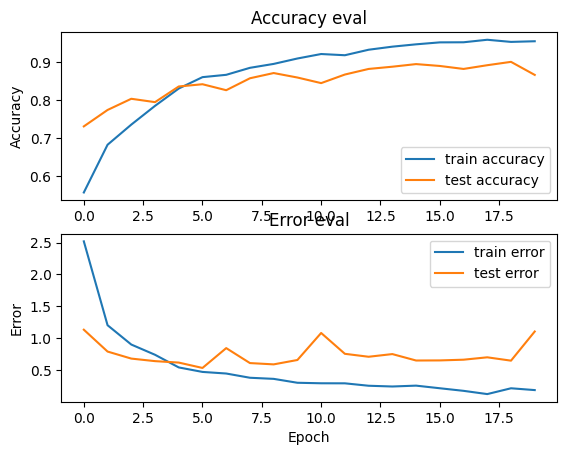

In [35]:
import matplotlib.pyplot as plt
def plot_history(history):
    
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

plot_history(history)

In [36]:
import sounddevice as sd
import numpy as np
import librosa
import tensorflow as tf
import os
import scipy.io.wavfile as wav

# Paramètres
duration = 1  # Durée de l'enregistrement (en secondes)

# Charger le modèle entraîné (modifié pour utiliser le format .keras)
model = tf.keras.models.load_model(r"model_2.keras")

# Liste des mots utilisés dans l'entraînement (à adapter selon ton dataset)
words = os.listdir(r"C:\Users\lenovo\Desktop\animals_sound")

def record_audio(duration, sr):
    print("🎤 Enregistrement en cours...")
    audio = sd.rec(int(duration * sr), samplerate=sr, channels=1, dtype=np.float32)
    sd.wait()
    wav.write("ouput.wav" , sr , audio)
    print("✅ Enregistrement terminé.")
    return audio.flatten()

def extract_features(signal, sr):
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    spectrogram_flat = spectrogram.flatten()

    # Ajuster la taille
    if len(spectrogram_flat) > fixed_length:
        spectrogram_flat = spectrogram_flat[:fixed_length]
    else:
        spectrogram_flat = np.pad(spectrogram_flat, (0, fixed_length - len(spectrogram_flat)))

    return np.array([spectrogram_flat])  # Ajouter une dimension pour le modèle

# 🎤 Enregistrer la voix



In [75]:
audio_signal = record_audio(duration, sr)

# 🔍 Extraire les caractéristiques
X_test = extract_features(audio_signal, sr)

# 🤖 Faire la prédiction
prediction = model.predict(X_test)
predicted_word = words[np.argmax(prediction)]  # Trouver le mot le plus probable

print(f"🗣️ Mot prédit : {predicted_word}")

🎤 Enregistrement en cours...
✅ Enregistrement terminé.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
🗣️ Mot prédit : zero
